# Conventional Computer Vision Example

In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
from skimage import morphology
import numpy as np
from PIL import Image

from utils.image_handling_utils import get_histogram, save_wsi, save_img

Image.MAX_IMAGE_PIXELS = None

## Thresholding - little effort, big effect

1. get your thresholds

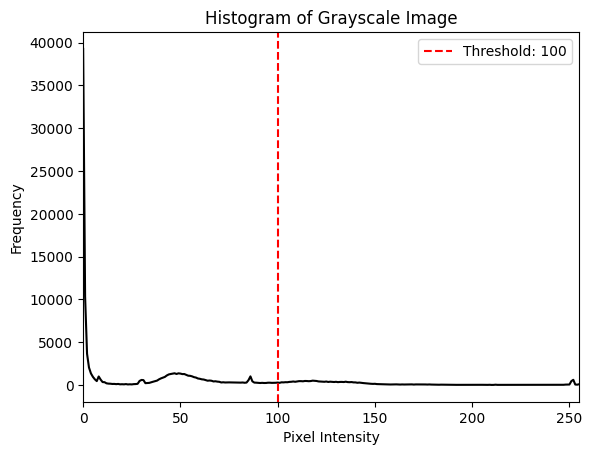

In [2]:
simple_img_path = Path('images/radiology_example.jpg')
simple_mask_path = Path('images/radiology_example_mask.png')
get_histogram(simple_img_path, 100)

2. Define some thresholding function

In [3]:
def generate_tissue_mask(
    img_path: Path,
    threshold: int = 25,
    min_object_size: int | None = None,
    min_hole_size: int | None = None,
    wsi: bool = False,
    invert: bool = False,
) -> None:
    """
    Generates and saves a binary mask of the tissue in the image.
    """
    
    img = Image.open(img_path).convert('L')
    img_array = np.array(img)
    img.close()

    if invert:
        img_array = 255 - img_array

    # threshold transformation
    img_array = (img_array < threshold)

    # removal of small objects and holes for cleaner image
    if min_object_size:
        img_array = morphology.remove_small_objects(img_array, min_object_size)
    if min_hole_size:
        img_array = morphology.remove_small_holes(img_array, min_hole_size)

    if not wsi:
       save_img(img_array, img_path)
    else:
        save_wsi(img_array, img_path)

3. Do it

In [4]:
generate_tissue_mask(
    img_path=simple_img_path,
    threshold=100,
    min_object_size=100,
    min_hole_size=100,
    invert = True
)

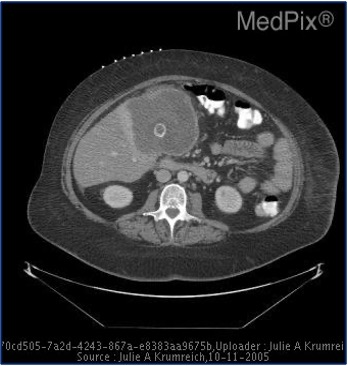

In [5]:
Image.open(simple_img_path)


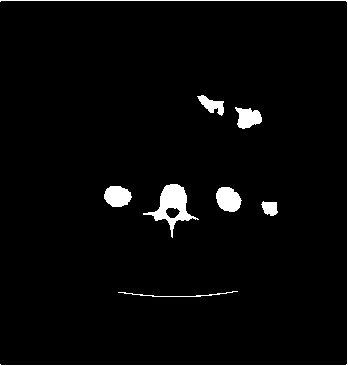

In [6]:
Image.open(simple_mask_path).convert("1")

4. Wait.... I thought this was about pathology?

In [7]:
path0_img_path = Path('images/w1-1-2-n.1.02.jpg')
path0_mask_path = Path('images/w1-1-2-n.1.02_mask.tiff')

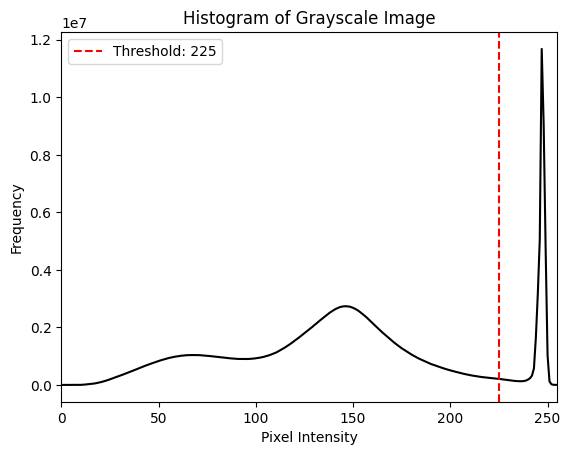

In [8]:
get_histogram(path0_img_path, 225)

In [9]:
generate_tissue_mask(
    img_path=path0_img_path,
    threshold=215,
    min_object_size=1000,
    min_hole_size=1000,
    wsi=True,
)

In [10]:
img = Image.open(path0_img_path).resize((256, 256))
mask = Image.open(path0_mask_path).resize((256, 256), resample=Image.NEAREST)

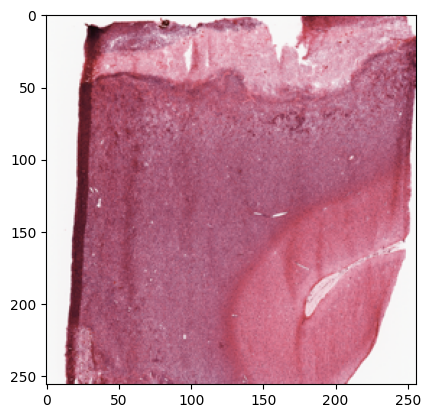

In [11]:
plt.imshow(img)

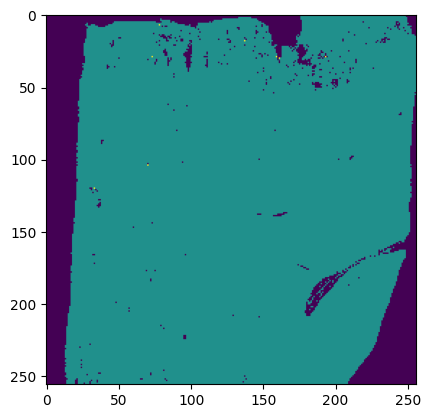

In [12]:
plt.imshow(mask)